# <font color = "#4477AA" ><b>US Health Insurance Charges Prediction</b>

# <b>Objectives:</b>

US Health Insuance dataset contains 1338 rows of insured data, where the insurance charges are given against the following 
attributes of the insured: Age, Sex, BMI, Number of childern, Smoker, and region. the aim of this analysis is to predict 
insurance charges from the other attributes. 

<font color = "#4477AA" ><b><h2><center> US Health Insurance Dataset Description</center> </h2></b> 


|S.No|Attribute|Assigned Code|Unit|Type of Data|
|----|---------|-------------|----|------------|
|1|**Age**|age|Number|Numeric|
|2|**Sex**|sex|0 (female) / 1 (male)|Binary|
|3|**Body Mass Index**|bmi|Numder|Numeric|
|4|**Number of children**|children|0,1,2,3,4,5|Numeric|
|5|**Smoker**|smoker|0(No) / 1(Yes)|Binary|
|6|**Region**|region|0(southwest),1(southeast),2(Northwest),3(Northwes)|Nominal|
|7|**Charges**|charges|Number|Numeric|

# <h3>Importing libraries</h3>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import sklearn.metrics as sklm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder


# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


<h3>Loading the dataset</h3>

In [2]:
path = "insurance.csv"
df = pd.read_csv(path)


<h3>Basic insights of dataset</h3>

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,Northwest,21984.47061
4,32,male,28.880,0,0,Northwest,3866.85520


In [4]:
df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker        int64
region       object
charges     float64
dtype: object

In [6]:
df.shape

(1338, 7)

## Summary Statistics

In [7]:
quantitative_variables = df[['age', 'bmi', 'charges']]
quantitative_variables.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [8]:
categorical_variables = df[['sex','children', 'smoker', 'region']]
def value_counts(dataframe):
    for i in dataframe:
        print (dataframe[i].value_counts())
        print ("______________________________")
value_counts(categorical_variables)        

male      676
female    662
Name: sex, dtype: int64
______________________________
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64
______________________________
0    1064
1     274
Name: smoker, dtype: int64
______________________________
southeast    364
southwest    325
Northwest    325
Northeast    324
Name: region, dtype: int64
______________________________


# <font color = "#4477AA" ><b><h3>Data preprocessing</h3></b>

## Checking for  missing values and duplicates

In [9]:
def summary(df):
    summary_df = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary_df['Missing#'] = df.isna().sum()
    summary_df['Duplicates'] = df.duplicated().sum()
    summary_df['Unique'] = df.nunique().values
    summary_df['Count'] = df.count().values
    return summary_df

summary(df).style.background_gradient(cmap='Blues')

,dtypes,Missing#,Duplicates,Unique,Count
age,int64,0,1,47,1338
sex,object,0,1,2,1338
bmi,float64,0,1,548,1338
children,int64,0,1,6,1338
smoker,int64,0,1,2,1338
region,object,0,1,4,1338
charges,float64,0,1,1337,1338


In [10]:
print("No missing values")
#Drop the duplicated entry
df.drop_duplicates(inplace=True)
print("And the duplicated valued droped :)")


No missing values
And the duplicated valued droped :)


In [11]:
df.shape

(1337, 7)

# <font color = "#4477AA" ><b><h3>Exploratory Data Analysis</h3></b>

# Distribution of Categorical variables

In [12]:
def plot_bar(df, cols):
    fig, axes = plt.subplots(2, 2, figsize=(8, 8), dpi=100)
    axes = axes.flatten()

    for i, col in enumerate(cols):
        counts = df[col].value_counts()
        counts.plot.bar(ax = axes[i],color= "skyblue")
        axes[i].set_title("Distibution of " + col)
        axes[i].set_xlabel(col)
    plt.tight_layout()
    plt.show()



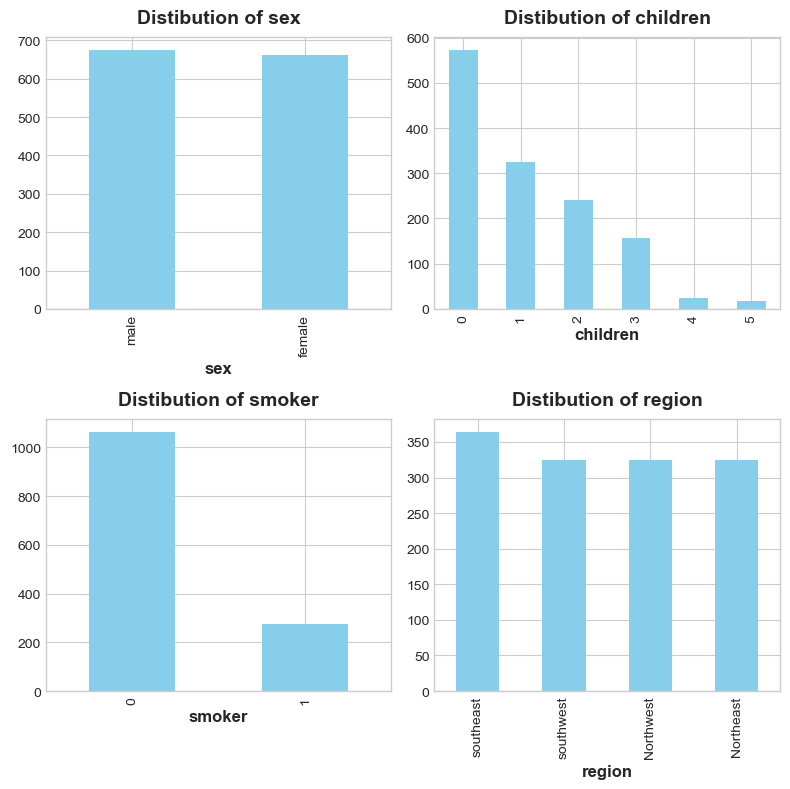

In [13]:
cat_cols =['sex','children', 'smoker', 'region']
plot_bar(df, cat_cols)

# Distribution of numeric variables

In [14]:
def plot_hist(df, cols ,  kind = "hist", alpha = 0.3, kde = True,color = "#4477DA"):
    for col in cols:
        
        sns.displot(data=df, x = df[col],  kind = kind, alpha = alpha, kde = kde, color = color)
        plt.title("Distibution of " + col)
        plt.xlabel(col)
        
        plt.show()


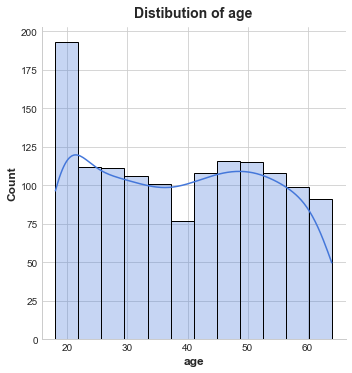

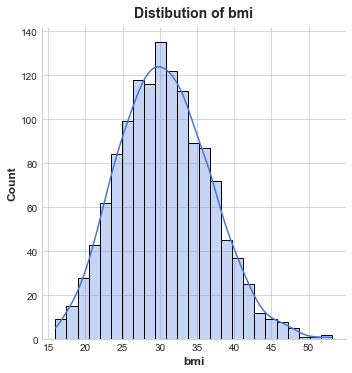

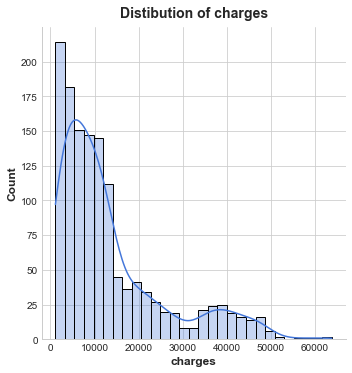

In [15]:
num_cols = ['age', 'bmi', 'charges']
plot_hist(df, num_cols )

<h3> Visualizing the relationship between categoric variables and the target variable</h3>

In [16]:
def plot_box(df, cols, col_y = 'charges'):
    fig, axes = plt.subplots(2, 2, figsize=(8, 8), dpi=100)
    axes = axes.flatten()

    for i, col in enumerate(cols):

        sns.boxplot(col, col_y, data = df,ax = axes[i],  palette='rocket')
        axes[i].set_xlabel(col)
    plt.tight_layout()
    plt.show()


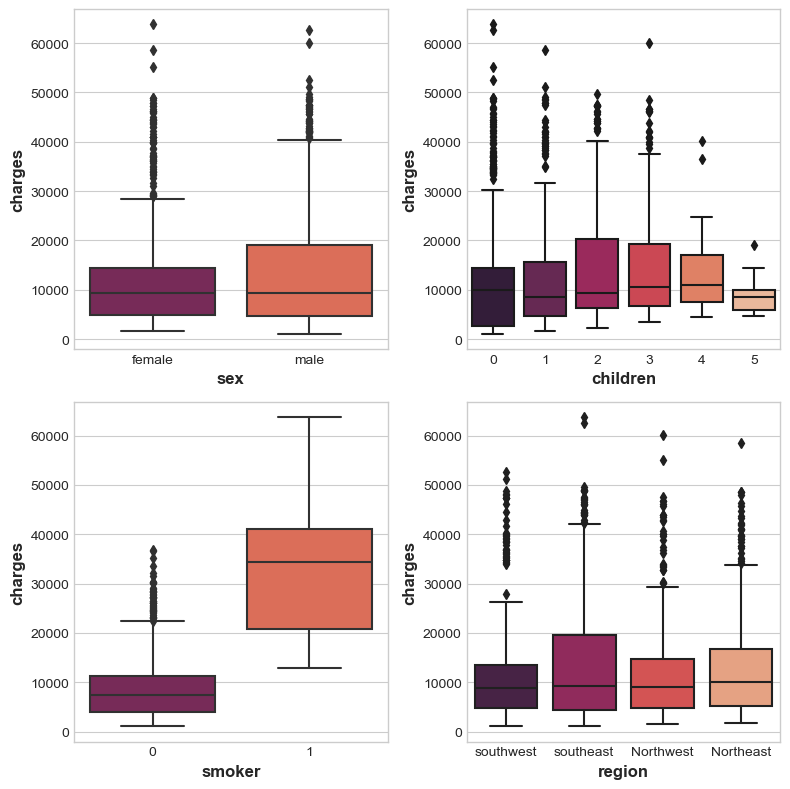

In [17]:
cat_cols = ['sex','children', 'smoker', 'region']
plot_box(df,cat_cols )

<h3> Visualizing the relationship between  numeric variables and the target variable using scatter plot </h3>

In [18]:
def plot_scatter(df, cols, col_y = "charges"):
    fig, axes = plt.subplots(1, 2, figsize=(8, 4), dpi=100)
    axes = axes.flatten()

    for i, col in enumerate(cols):
        sns.scatterplot(x=col, y=col_y, data=df, ax=axes[i])
        axes[i].set_title("Scatter plot of " + col_y + " vs. " + col)

    plt.tight_layout()
    plt.show()


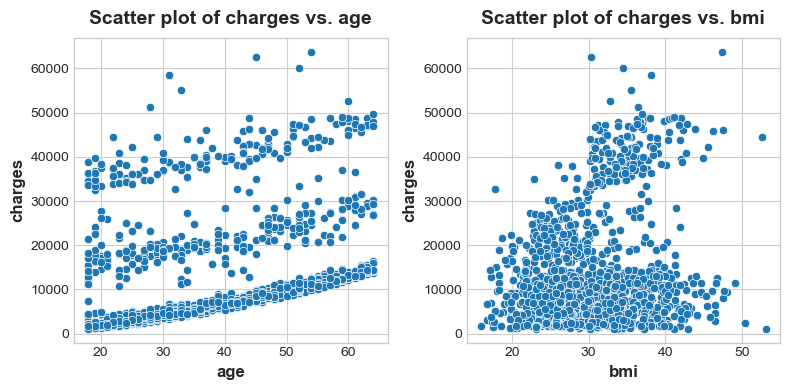

In [19]:
num_cols = ['age', 'bmi']
plot_scatter(df,num_cols )

In [20]:
skew_limit = 0.75
num_cols = ['age', 'bmi', 'charges']
df[num_cols].skew()

age        0.054781
bmi        0.283914
charges    1.515391
dtype: float64

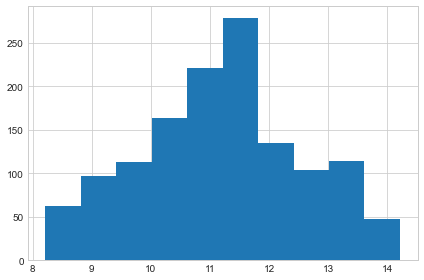

In [21]:
from scipy.stats import boxcox
bxcx = boxcox(df["charges"])
array = bxcx[0]
lamda = bxx = bxcx[1]
plt.hist(array);

In [22]:
df["charges"] = array
df["charges"].skew()

-0.008674297022526162

## One Hot Encoding

In [23]:
dummy_variable_1 = pd.get_dummies(df[["region","sex"]])  
dummy_variable_1.head()
# merge data frame  "df " and  "dummy_variable_1 
df = pd.concat([df, dummy_variable_1], axis=1) 
df.head()

,age,sex,bmi,children,smoker,region,charges,region_Northeast,region_Northwest,region_southeast,region_southwest,sex_female,sex_male
0,19,female,27.900,0,1,southwest,12.120634,0,0,0,1,1,0
1,18,male,33.770,1,0,southeast,8.804026,0,0,1,0,0,1
2,28,male,33.000,3,0,southeast,10.141549,0,0,1,0,0,1
3,33,male,22.705,0,0,Northwest,12.526076,0,1,0,0,0,1
4,32,male,28.880,0,0,Northwest,9.939887,0,1,0,0,0,1


In [24]:
df.drop(["sex", "region"], axis =1,inplace = True)

In [25]:
df.shape

(1337, 11)

# Correlation between features

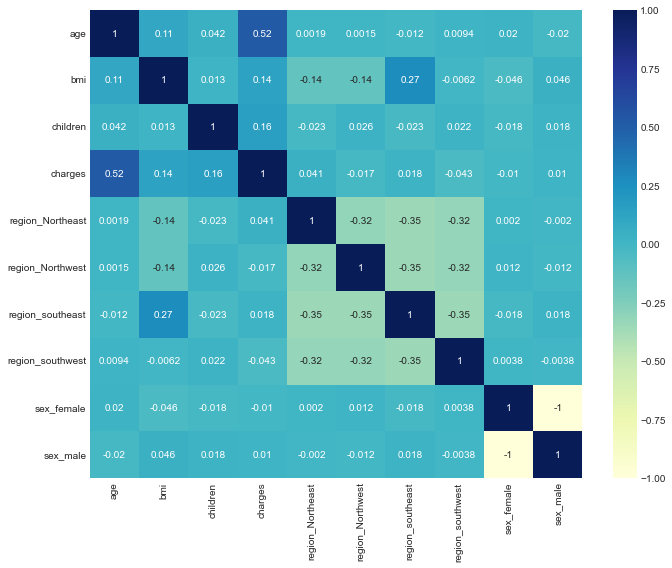

In [26]:
corr = df.drop("smoker", axis =1).corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cmap='YlGnBu', annot=True)
plt.show()

## Features selection

In [27]:
y = df["charges"]
x = df.drop("charges", axis = 1)

In [28]:
discrete_features = x.dtypes == int

In [29]:
from sklearn.feature_selection import mutual_info_regression
def make_mi_scores(x,y,discrete_features):
    mi_scores = mutual_info_regression(x,y,discrete_features =discrete_features )
    mi_scores = pd.Series(mi_scores, name = "MI Scores", index = x.columns)
    mi_scores = mi_scores.sort_values(ascending = False)
    return mi_scores
mi_scores =  make_mi_scores(x,y,discrete_features) 
mi_scores

age                 1.491672
smoker              0.369493
sex_female          0.175906
sex_male            0.175906
children            0.160423
bmi                 0.070085
region_Northwest    0.057443
region_Northeast    0.054281
region_southeast    0.036000
region_southwest    0.003071
Name: MI Scores, dtype: float64

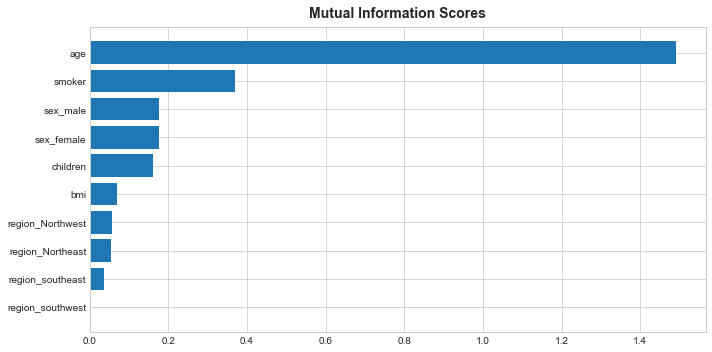

In [30]:
def plot_mi_scores(scores):
    fig, ax = plt.subplots(figsize=(10,5))
    scores = scores.sort_values(ascending = True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    
    
plot_mi_scores(mi_scores)

In [31]:
x.columns

Index(['age', 'bmi', 'children', 'smoker', 'region_Northeast',
       'region_Northwest', 'region_southeast', 'region_southwest',
       'sex_female', 'sex_male'],
      dtype='object')

# Modelling

In [32]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)


print("number of test samples :",X_test.shape[0])
print("number of training samples:",X_train.shape[0])

number of test samples : 402
number of training samples: 935


In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(df_scaled, columns = X_train.columns)

df_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(df_scaled, columns = X_test.columns)
X_test.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
age,402.0,-0.006,1.016,-1.520,-0.948,0.054,0.841,1.771
bmi,402.0,0.025,1.071,-2.313,-0.729,-0.020,0.701,2.924
children,402.0,0.005,1.033,-0.917,-0.917,-0.079,0.759,3.273
smoker,402.0,-0.123,0.906,-0.532,-0.532,-0.532,-0.532,1.881
region_Northeast,402.0,0.047,1.029,-0.556,-0.556,-0.556,1.797,1.797
region_Northwest,402.0,0.005,1.004,-0.565,-0.565,-0.565,-0.565,1.771
region_southeast,402.0,-0.019,0.991,-0.616,-0.616,-0.616,1.624,1.624
region_southwest,402.0,-0.031,0.983,-0.573,-0.573,-0.573,-0.573,1.746
sex_female,402.0,0.149,0.998,-0.947,-0.947,1.056,1.056,1.056
sex_male,402.0,-0.149,0.998,-1.056,-1.056,-1.056,0.947,0.947


In [34]:
def residuals_plot(y_pred):
    '''
    1) Ploting scatter plot
    2) Plotting histogram'''
    
    resids = np.subtract(y_test,y_pred)
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    # Left: Sxatter plot
    ax[0] = sns.regplot(y_pred,resids, fit_reg = False, ax=ax[0])
    ax[0].set_xlabel('Residual values')
    ax[0].set_ylabel('Count')
    ax[0].set_title('Scatter of residuals')

    # Right: Histogram
    ax[1] = sns.distplot(resids, ax=ax[1])
    ax[1].set_xlabel('Residual values')
    ax[1].set_ylabel('Count')
    ax[1].set_title('Histogram of residuals')
    plt.show()

## Regular Linear Regression

### Create a linear regression object

In [35]:
lre=LinearRegression()

### Fit the data

In [36]:
### training -fitting- the model
lre.fit(X_train, y_train)

LinearRegression()

### Predictions

In [37]:
yhat_train = lre.predict(X_train)
yhat_test = lre.predict(X_test)

### EVALUATING THE MODEL

In [38]:
#Evaluate the model using r2 and mean squared
train_mse = mean_squared_error(y_train, yhat_train)
test_mse = mean_squared_error(y_test, yhat_test)
train_r2 = r2_score(y_train, yhat_train)
test_r2 = r2_score(y_test, yhat_test)
#Print the evaluation metrics
print("Train MSE:           ",train_mse)
print("Test MSE:            ",test_mse)
print("Train R_Squareg:     ",train_r2)
print("Test R_Squared:      ",test_r2 )

Train MSE:            0.44038528645846053
Test MSE:             0.3991256079753208
Train R_Squareg:      0.7652785867342013
Test R_Squared:       0.7787546969312306


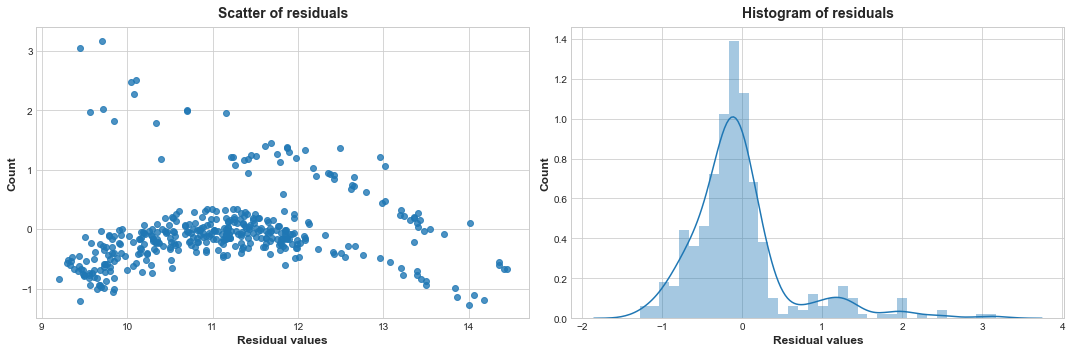

In [39]:
residuals_plot(yhat_test)

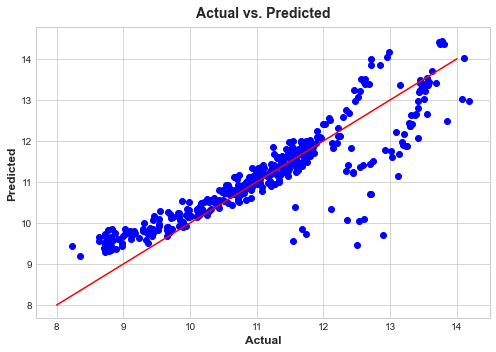

In [40]:
# Plot actual vs. predicted values for Decision Tree
plt.figure(figsize=( 7,5))
plt.scatter(y_test, yhat_test, color='b')
plt.plot(np.array([8,14]), np.array([8,14]), color='red')
plt.title('Actual vs. Predicted') 
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.show()

## Ridge Regression

In [41]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
# Define hyperparameters for grid tuning
param_grid = {"alpha":  [0.1,1,10,100]}


In [42]:
grid_search = GridSearchCV(ridge,param_grid, cv =5 )
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.1, 1, 10, 100]})

In [43]:
best_alpha = grid_search.best_params_["alpha"]
best_model = grid_search.best_estimator_
print("Best alpha:",best_alpha)
print("Best model:",best_model)

Best alpha: 1
Best model: Ridge(alpha=1)


In [44]:
test_score = best_model.score(X_test,y_test)
test_score

0.7773304247495461

In [45]:
yhat_train = best_model.predict(X_train)
yhat_test = best_model.predict(X_test)


In [46]:
#Evaluate the model using r2 and mean squared
train_mse = mean_squared_error(y_train, yhat_train)
test_mse = mean_squared_error(y_test, yhat_test)
train_r2 = r2_score(y_train, yhat_train)
test_r2 = r2_score(y_test, yhat_test)
#Print the evaluation metrics
print("Train MSE:           ",train_mse)
print("Test MSE:            ",test_mse)
print("Train R_Squareg:     ",train_r2)
print("Test R_Squared:      ",test_r2 )

Train MSE:            0.44014556326866905
Test MSE:             0.40169498907653434
Train R_Squareg:      0.7654063570472218
Test R_Squared:       0.7773304247495461


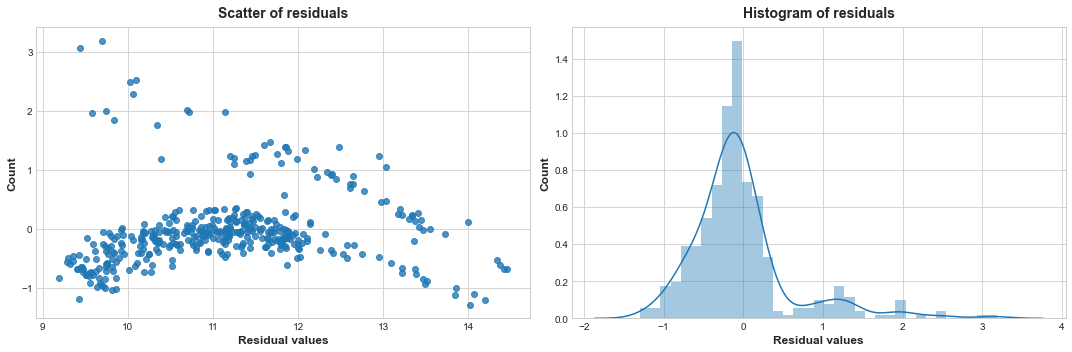

In [47]:
residuals_plot(yhat_test)

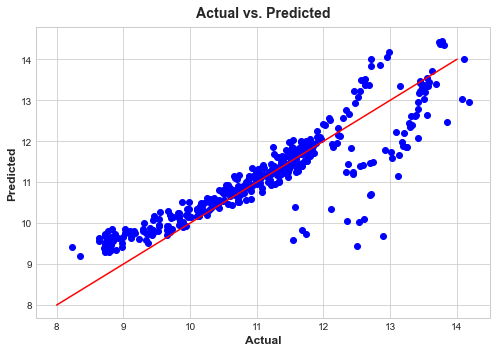

In [48]:
# Plot actual vs. predicted values for Decision Tree
plt.figure(figsize=( 7,5))
plt.scatter(y_test, yhat_test, color='b')
plt.plot(np.array([8,14]), np.array([8,14]), color='red')
plt.title('Actual vs. Predicted') 
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.show()

## Random forest classifier

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [50]:
#Create a Randomodelm Forest Classifier object
model = RandomForestRegressor(n_estimators = 100, random_state=0)

In [51]:
# Train the classifier
rfc = model.fit(X_train, y_train)
# Make predictions
yhat_train = rfc.predict(X_train)
yhat_test = rfc.predict(X_test)


### Evaluate the performance

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,\
                            r2_score,mean_absolute_percentage_error

In [53]:
#Evaluate the model using r2 and mean squared
train_mse = mean_squared_error(y_train, yhat_train)
test_mse = mean_squared_error(y_test, yhat_test)
train_r2 = r2_score(y_train, yhat_train)
test_r2 = r2_score(y_test, yhat_test)
#Print the evaluation metrics
print("Train MSE:           ",train_mse)
print("Test MSE:            ",test_mse)
print("Train R_Squareg:     ",train_r2)
print("Test R_Squared:      ",test_r2 )

Train MSE:            0.05228579828132134
Test MSE:             0.3278180155456538
Train R_Squareg:      0.9721321378263625
Test R_Squared:       0.8182822781812452


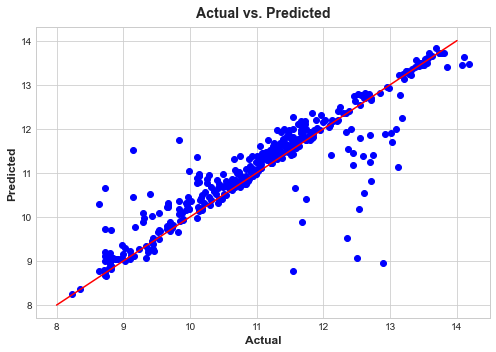

In [54]:
# Plot actual vs. predicted values for Decision Tree
plt.figure(figsize=( 7,5))
plt.scatter(y_test, yhat_test, color='b')
plt.plot(np.array([8,14]), np.array([8,14]), color='red')
plt.title('Actual vs. Predicted') 
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.show()

## Polynomial regression model

In [55]:
#Create polynomial features
poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)
poly_features


#Train the polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)


#Make predictions on training and testing data
y_train_pred = poly_reg.predict(X_train_poly)
y_test_pred = poly_reg.predict(X_test_poly)


#Evaluate the model using r2 and mean squared
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
#Print the evaluation metrics
print("Train MSE:           ",train_mse)
print("Test MSE:            ",test_mse)
print("Train R_Squareg:     ",train_r2)
print("Test R_Squared:      ",test_r2 )

Train MSE:            0.28620540952402557
Test MSE:             0.30312401232245795
Train R_Squareg:      0.8474550801911667
Test R_Squared:       0.8319707815444144


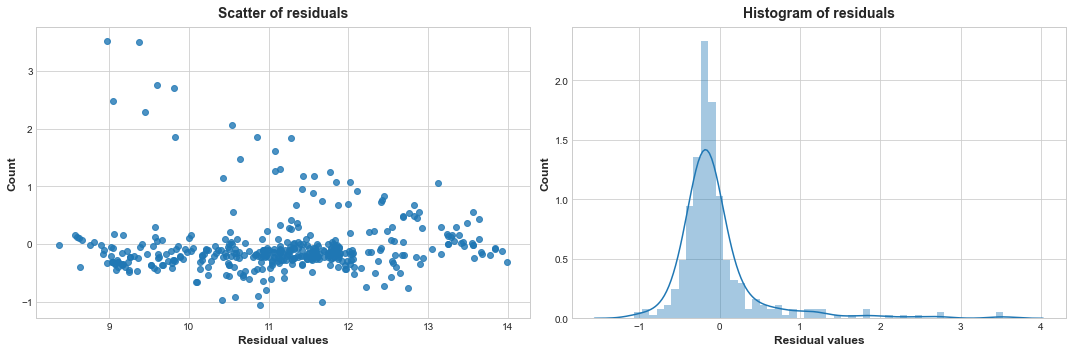

In [56]:
residuals_plot(y_test_pred)

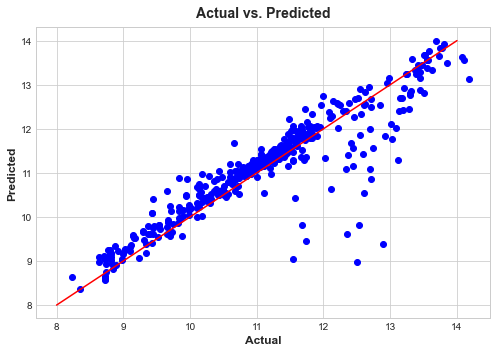

In [57]:
# Plot actual vs. predicted values for Decision Tree
plt.figure(figsize=( 7,5))
plt.scatter(y_test, y_test_pred, color='b')
plt.plot(np.array([8,14]), np.array([8,14]), color='red')
plt.title('Actual vs. Predicted') 
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.show()

In [58]:
result = pd.DataFrame({
    'Algorithm' : ["Regular Linear Regression","Ridge regression",'RandomForestClassifier',"Polynomial"],
    'Score' : [0.7787546969312306, 0.7773304247495461,0.8182822781812452, 0.8319707815444144]
})

result.sort_values(by='Score', inplace=True)

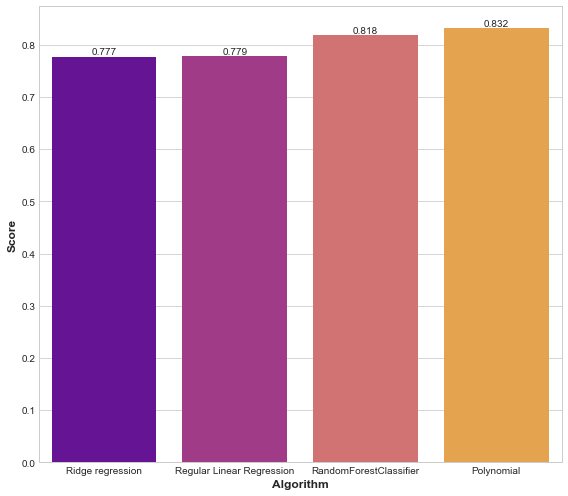

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(8, 7))

sns.barplot(x='Algorithm', y='Score', data=result, palette = "plasma")
ax.bar_label(ax.containers[0], fmt='%.3f')
ax.set_xticklabels(labels=result.Algorithm)
plt.show()

## Result

## The best model based on test R2 score is : Polynomial Regression

In [71]:
importance = poly_reg.coef_ 

for i, feature in enumerate(x.columns):
    print(f"{feature}: {importance[i]}") 

print()

age: -13820484.59380041
bmi: 253458589135.055
children: -328205831134.4127
smoker: 2336211107658.814
region_Northeast: 780803855226.1528
region_Northwest: -642824629232.743
region_southeast: 2706322981904.5356
region_southwest: 5446964940666.283
sex_female: -2483562210716.091
sex_male: -4869041509548.435

